#### Step 1 导入相关包

In [1]:
import pandas as pd
import numpy as np
import pickle
import json

from tqdm import tqdm
from collections import defaultdict
import pickle
from itertools import combinations

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2 读取pickle和txt数据

In [2]:
# 打开文件
with open('../data/graph comp/total_graph_list.pickle', 'rb') as file:
    # 读取文件内容
    graph_list = pickle.load(file)

In [3]:
# 打开文件
with open('../data/graph comp/sub_graph_list.pickle', 'rb') as file:
    # 读取文件内容
    sub_graph_list = pickle.load(file)

In [4]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return intersection_size / union_size if union_size != 0 else 0  # handle division by zero

In [5]:
# 计算节点的交集（重叠部分）
sim_aca_indu = []
sim_aca_coo = []
sim_indu_coo = []
# 获取它们的节点集合
for year in range(2000,2023):
    nodes_aca = set(sub_graph_list[year]['academic'].nodes)
    nodes_indu = set(sub_graph_list[year]['industry'].nodes)
    nodes_coo = set(sub_graph_list[year]['cooperation'].nodes)
    
    sim_aca_indu.append(jaccard_similarity(nodes_aca,nodes_indu))
    sim_aca_coo.append(jaccard_similarity(nodes_aca,nodes_coo))
    sim_indu_coo.append(jaccard_similarity(nodes_indu,nodes_coo))

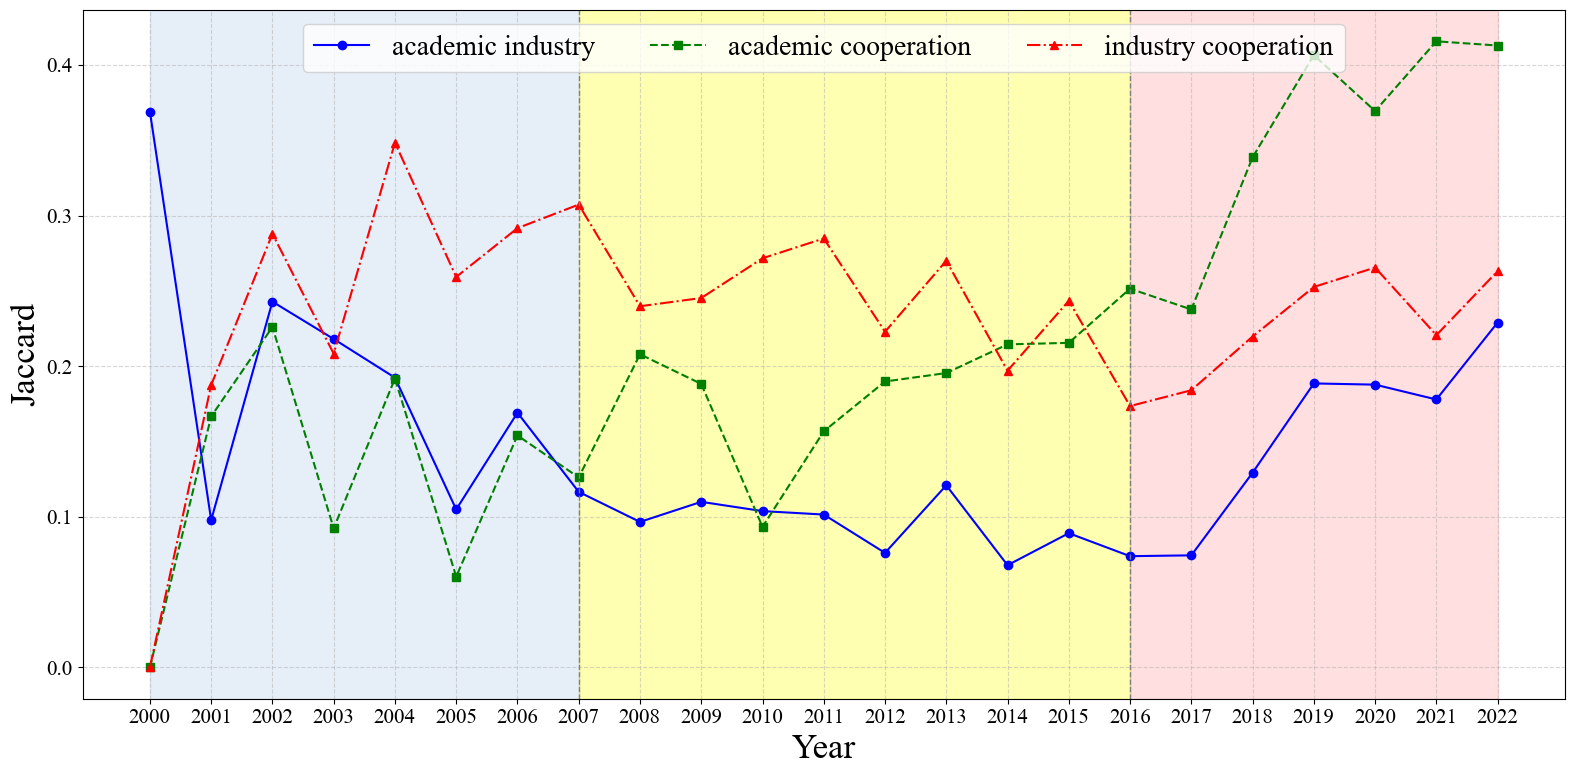

In [6]:
from matplotlib import pyplot as plt
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15  # 设置全局字体大小

# 假设你已经有了 x 轴数据和三组 y 轴数据
x = range(2000, 2023)
# 绘制折线图
plt.figure(figsize=(16, 8))
plt.plot(x, sim_aca_indu, label='academic industry', linestyle='-', marker='o', color='blue')
plt.plot(x, sim_aca_coo, label='academic cooperation', linestyle='--', marker='s', color='green')
plt.plot(x, sim_indu_coo, label='industry cooperation', linestyle='-.', marker='^', color='red')

# 添加垂直线标示2007年和2014年
plt.axvline(x=2007, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=2016, color='gray', linestyle='--', linewidth=1)

# 添加2007年到2014年的黄色背景
plt.axvspan(2000, 2007, color='#aec7e8', alpha=0.3)
# 添加2007年到2014年的黄色背景
plt.axvspan(2007, 2016, color='yellow', alpha=0.3)
# 修改2016年之后的背景颜色为灰色，透明度为0.3
plt.axvspan(2016, 2022, color='#ff9896', alpha=0.3)

# 调整图例的位置到图的上方居中横排
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20)

# 去掉图中标题
plt.xlabel('Year', fontsize=25)
plt.ylabel('Jaccard', fontsize=25)

# 设置 x 轴刻度
plt.xticks(x)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图表
plt.tight_layout()
plt.show()


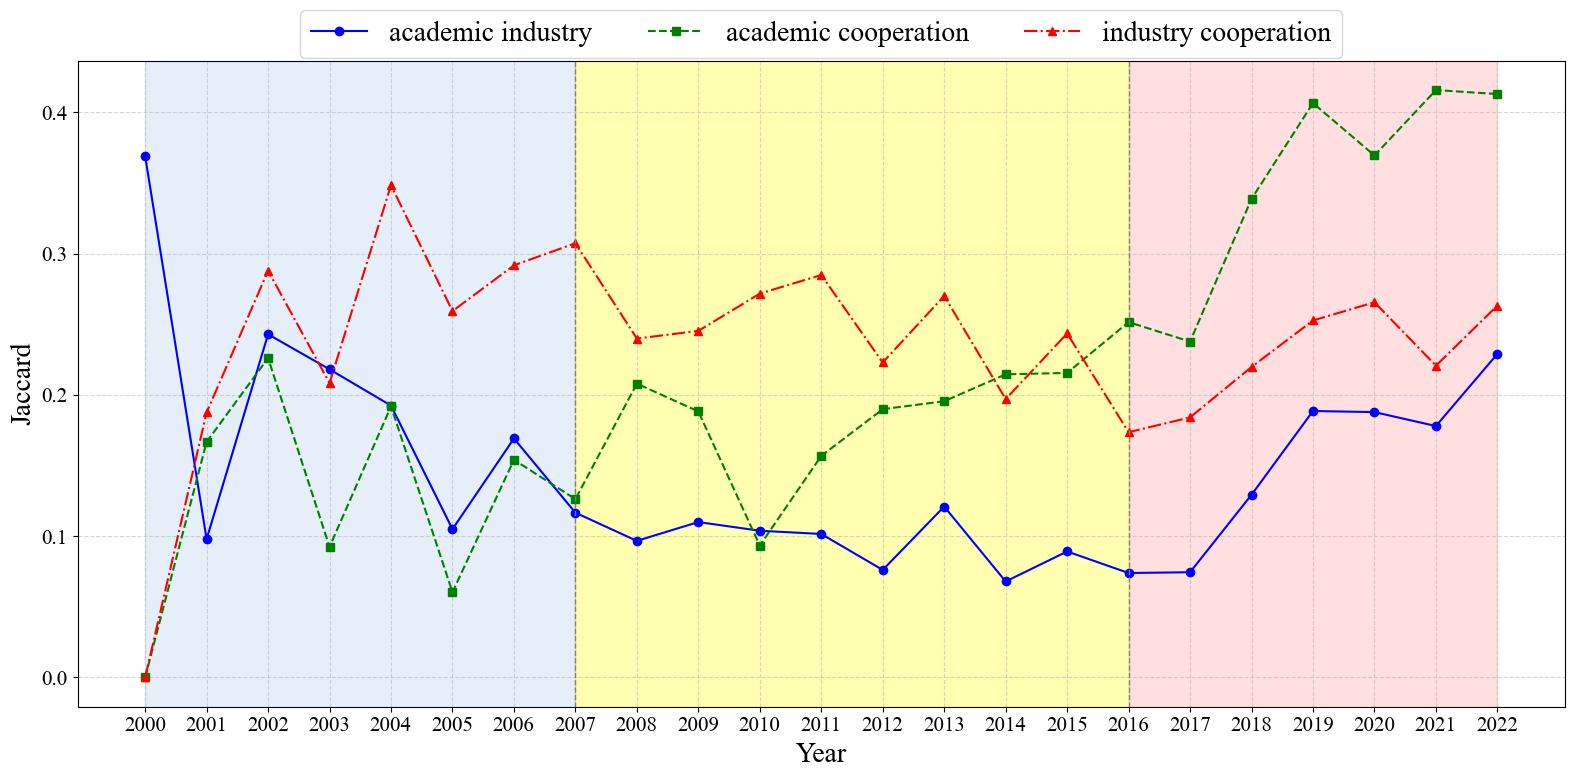

In [10]:
from matplotlib import pyplot as plt

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15  # 设置全局字体大小

# 假设你已经有了 x 轴数据和三组 y 轴数据
x = range(2000, 2023)
# 绘制折线图
plt.figure(figsize=(16, 8))
plt.plot(x, sim_aca_indu, label='academic industry', linestyle='-', marker='o', color='blue')
plt.plot(x, sim_aca_coo, label='academic cooperation', linestyle='--', marker='s', color='green')
plt.plot(x, sim_indu_coo, label='industry cooperation', linestyle='-.', marker='^', color='red')

# 添加垂直线标示2007年和2014年
plt.axvline(x=2007, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=2016, color='gray', linestyle='--', linewidth=1)

# 添加不同年份段的背景色
plt.axvspan(2000, 2007, color='#aec7e8', alpha=0.3)
plt.axvspan(2007, 2016, color='yellow', alpha=0.3)
plt.axvspan(2016, 2022, color='#ff9896', alpha=0.3)

# 调整图例的位置到图的上方居中横排
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=20)

# 设置 x 轴和 y 轴标签
plt.xlabel('Year', fontsize=20)
plt.ylabel('Jaccard', fontsize=20)

# 设置 x 轴刻度
plt.xticks(x)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图表
plt.tight_layout()
plt.show()


In [30]:
# 计算最大连通子图
total_max_graph = defaultdict(dict)
for year in range(2000,2023):
    largest_bb = max(nx.connected_components(graph_list[year]), key=len)
    total_max_graph[year] = len(largest_bb)
    # 输出最大连通子图的规模
    print(f"{year} 最大连通子图的规模:{len(largest_bb)}" )

2000 最大连通子图的规模:92
2001 最大连通子图的规模:115
2002 最大连通子图的规模:172
2003 最大连通子图的规模:361
2004 最大连通子图的规模:541
2005 最大连通子图的规模:628
2006 最大连通子图的规模:1120
2007 最大连通子图的规模:1113
2008 最大连通子图的规模:931
2009 最大连通子图的规模:1522
2010 最大连通子图的规模:1584
2011 最大连通子图的规模:1567
2012 最大连通子图的规模:1610
2013 最大连通子图的规模:2274
2014 最大连通子图的规模:1935
2015 最大连通子图的规模:2856
2016 最大连通子图的规模:2909
2017 最大连通子图的规模:2647
2018 最大连通子图的规模:4874
2019 最大连通子图的规模:6664
2020 最大连通子图的规模:6745
2021 最大连通子图的规模:9076
2022 最大连通子图的规模:10030


In [31]:
# 计算最大连通子图
max_sub_graph = defaultdict(dict)
max_sub_graph['industry'] = dict()
max_sub_graph['academic'] = dict()
max_sub_graph['cooperation'] = dict()
for year in range(2000,2023):
    
    try:
        no_cooperation = nx.compose(sub_graph_list[year]['academic'],sub_graph_list[year]['industry'])
        largest_aa = max(nx.connected_components(no_cooperation), key=len)
        max_sub_graph['cooperation'][year] = len(largest_aa)

        no_academic = nx.compose(sub_graph_list[year]['cooperation'],sub_graph_list[year]['industry'])
        largest_bb = max(nx.connected_components(no_academic), key=len)
        max_sub_graph['academic'][year] = len(largest_bb)
        
        no_industry = nx.compose(sub_graph_list[year]['cooperation'],sub_graph_list[year]['academic'])
        largest_cc = max(nx.connected_components(no_industry), key=len)
        max_sub_graph['industry'][year] = len(largest_cc)

    except Exception as e:
        continue

In [32]:
max_sub_graph['industry']

{2000: 78,
 2001: 100,
 2002: 144,
 2003: 314,
 2004: 464,
 2005: 562,
 2006: 946,
 2007: 973,
 2008: 806,
 2009: 1328,
 2010: 1410,
 2011: 1344,
 2012: 1355,
 2013: 1978,
 2014: 1683,
 2015: 2513,
 2016: 2537,
 2017: 2293,
 2018: 4111,
 2019: 5454,
 2020: 5365,
 2021: 7296,
 2022: 7730}

#### Step 3 计算连通子图的比例

In [33]:
ratio_lists_academic = []
ratio_lists_industry = []
ratio_lists_cooperation = []
for year in range(2000,2023):
    total_large_graph = total_max_graph[year]

    ratio_academic = 1 - max_sub_graph['academic'][year] / total_large_graph
    ratio_lists_academic.append(ratio_academic)

    ratio_industry = 1 - max_sub_graph['industry'][year] / total_large_graph
    ratio_lists_industry.append(ratio_industry)

    ratio_cooperation = 1 - max_sub_graph['cooperation'][year] / total_large_graph
    ratio_lists_cooperation.append(ratio_cooperation)

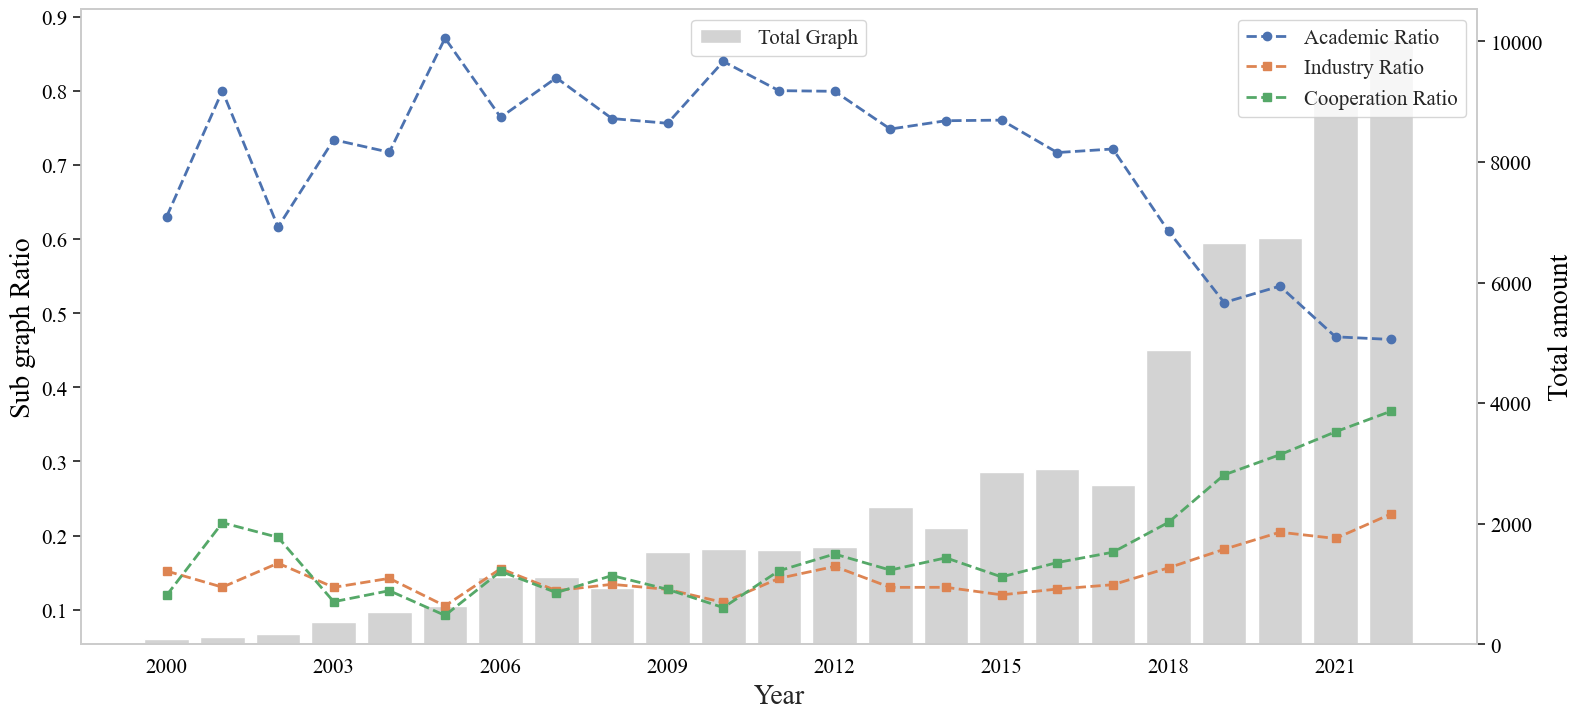

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 Seaborn 的配色方案
sns.set_theme(style="whitegrid")
year = range(2000, 2023)
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形和轴
fig, ax1 = plt.subplots(figsize=(16, 8))


# 设置纵坐标轴1（左侧）
color_academic = sns.color_palette("deep")[0]  # 深色调蓝色
color_industry = sns.color_palette("deep")[1]  # 深色调橙色
color_cooperation = sns.color_palette("deep")[2]  # 深色调绿色
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Sub graph Ratio', color='black', fontsize=20)  # 统一黑色
ax1.plot(year, ratio_lists_academic, marker='o', linestyle='--', color=color_academic, linewidth=2, label='Academic Ratio')
ax1.plot(year, ratio_lists_industry, marker='s', linestyle='--', color=color_industry, linewidth=2, label='Industry Ratio')
ax1.plot(year, ratio_lists_cooperation, marker='s', linestyle='--', color=color_cooperation, linewidth=2, label='Cooperation Ratio')
ax1.tick_params(axis='y', labelcolor='black')  # 统一黑色

# 添加图例到左上角
ax1.legend(loc='upper right', fontsize=15)

# 设置纵坐标轴2（右侧）
ax2 = ax1.twinx()
color_total = sns.color_palette("pastel")[3]  # 浅色调紫色
ax2.set_ylabel('Total amount', color='black', fontsize=20)  # 统一黑色
ax2.bar(year, list(total_max_graph.values()), color='lightgrey', label='Total Graph')  # 使用柱状图，并设置浅色调
ax2.tick_params(axis='y', labelcolor='black')  # 统一黑色

# 将柱状图置于底层
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

# 添加图例到右上角
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=15)
# 添加图例到右上角

# 去除网格线
ax1.grid(False)
ax2.grid(False)

# 设置 x 轴的刻度
plt.xticks(range(2000, 2023, 3), rotation=45, fontsize=20)  # 旋转刻度标签以防止重叠


# 设置 y 轴的刻度字体大小
ax1.tick_params(axis='y', labelcolor='black', labelsize=15)  # 设置y轴刻度字体大小为15
ax2.tick_params(axis='y', labelcolor='black', labelsize=15)  # 设置第二个y轴刻度字体大小为15
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)  # 设置y轴刻度字体大小为15

# 调整图形布局以适应标题和标签
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()

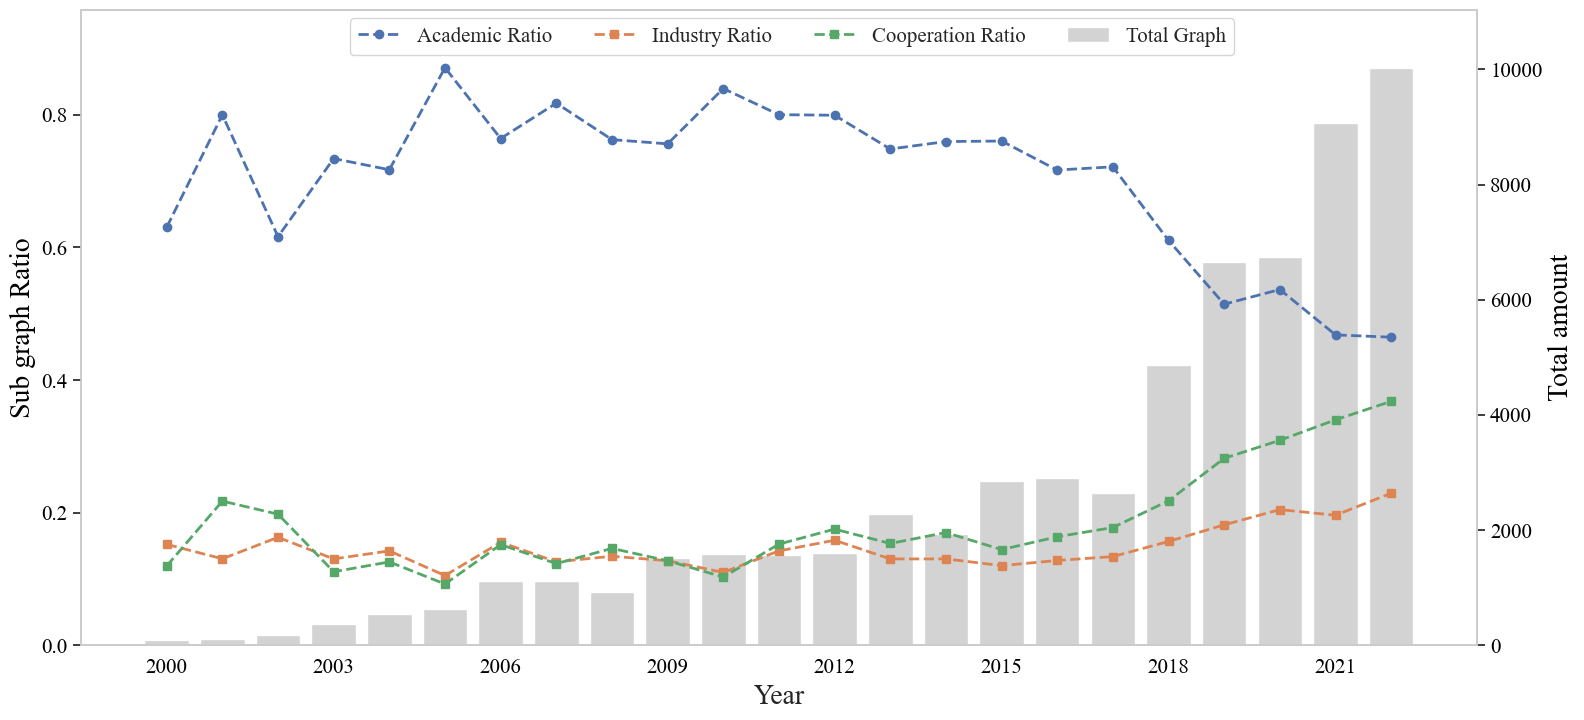

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 Seaborn 的配色方案
sns.set_theme(style="whitegrid")
year = range(2000, 2023)

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形和轴
fig, ax1 = plt.subplots(figsize=(16, 8))

# 设置纵坐标轴1（左侧）
color_academic = sns.color_palette("deep")[0]  # 深色调蓝色
color_industry = sns.color_palette("deep")[1]  # 深色调橙色
color_cooperation = sns.color_palette("deep")[2]  # 深色调绿色
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Sub graph Ratio', color='black', fontsize=20)  # 统一黑色
ax1.plot(year, ratio_lists_academic, marker='o', linestyle='--', color=color_academic, linewidth=2, label='Academic Ratio')
ax1.plot(year, ratio_lists_industry, marker='s', linestyle='--', color=color_industry, linewidth=2, label='Industry Ratio')
ax1.plot(year, ratio_lists_cooperation, marker='s', linestyle='--', color=color_cooperation, linewidth=2, label='Cooperation Ratio')
ax1.tick_params(axis='y', labelcolor='black')  # 统一黑色

# 设置纵坐标轴2（右侧）
ax2 = ax1.twinx()
color_total = sns.color_palette("pastel")[3]  # 浅色调紫色
ax2.set_ylabel('Total amount', color='black', fontsize=20)  # 统一黑色
ax2.bar(year, list(total_max_graph.values()), color='lightgrey', label='Total Graph')  # 使用柱状图，并设置浅色调
ax2.tick_params(axis='y', labelcolor='black')  # 统一黑色

# 将柱状图置于底层
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

# 去除网格线
ax1.grid(False)
ax2.grid(False)

# 设置 x 轴的刻度
plt.xticks(range(2000, 2023, 3), rotation=45, fontsize=20)  # 旋转刻度标签以防止重叠

# 调整纵坐标轴范围
ax1.set_ylim(bottom=0, top=max(max(ratio_lists_academic), max(ratio_lists_industry), max(ratio_lists_cooperation)) * 1.1)
ax2.set_ylim(bottom=0, top=max(total_max_graph.values()) * 1.1)

# 设置 y 轴的刻度字体大小
ax1.tick_params(axis='y', labelcolor='black', labelsize=15)  # 设置y轴刻度字体大小为15
ax2.tick_params(axis='y', labelcolor='black', labelsize=15)  # 设置第二个y轴刻度字体大小为15
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)  # 设置x轴刻度字体大小为15

# 调整图形布局以适应标题和标签
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 添加图例到右上角，确保两个图例都居中
fig.legend(loc='upper center', bbox_to_anchor=(0.5,  0.93), ncol=4, fontsize=15)

# 显示图形
plt.show()


In [36]:
# 计算最大连通子图
max_sub_graph = defaultdict(dict)
max_sub_graph['industry'] = dict()
max_sub_graph['academic'] = dict()
max_sub_graph['cooperation'] = dict()
for year in range(2000,2023):
    
    try:
        if sub_graph_list[year]['cooperation'].number_of_nodes() == 0:
            max_sub_graph['cooperation'][year] = 0
        else:
            largest_aa = max(nx.connected_components(sub_graph_list[year]['cooperation']), key=len)
            max_sub_graph['cooperation'][year] = len(largest_aa)

        largest_bb = max(nx.connected_components(sub_graph_list[year]['academic']), key=len)
        max_sub_graph['academic'][year] = len(largest_bb)
        
        largest_cc = max(nx.connected_components(sub_graph_list[year]['industry']), key=len)
        max_sub_graph['industry'][year] = len(largest_cc)

    except Exception as e:
        pass

In [13]:
ratio_lists_academic = []
ratio_lists_industry = []
ratio_lists_cooperation = []
for year in range(2000,2023):
    total_large_graph = total_max_graph[year]

    ratio_academic = max_sub_graph['academic'][year] / total_large_graph
    ratio_lists_academic.append(ratio_academic)

    ratio_industry = max_sub_graph['industry'][year] / total_large_graph
    ratio_lists_industry.append(ratio_industry)

    ratio_cooperation = max_sub_graph['cooperation'][year] / total_large_graph
    ratio_lists_cooperation.append(ratio_cooperation)

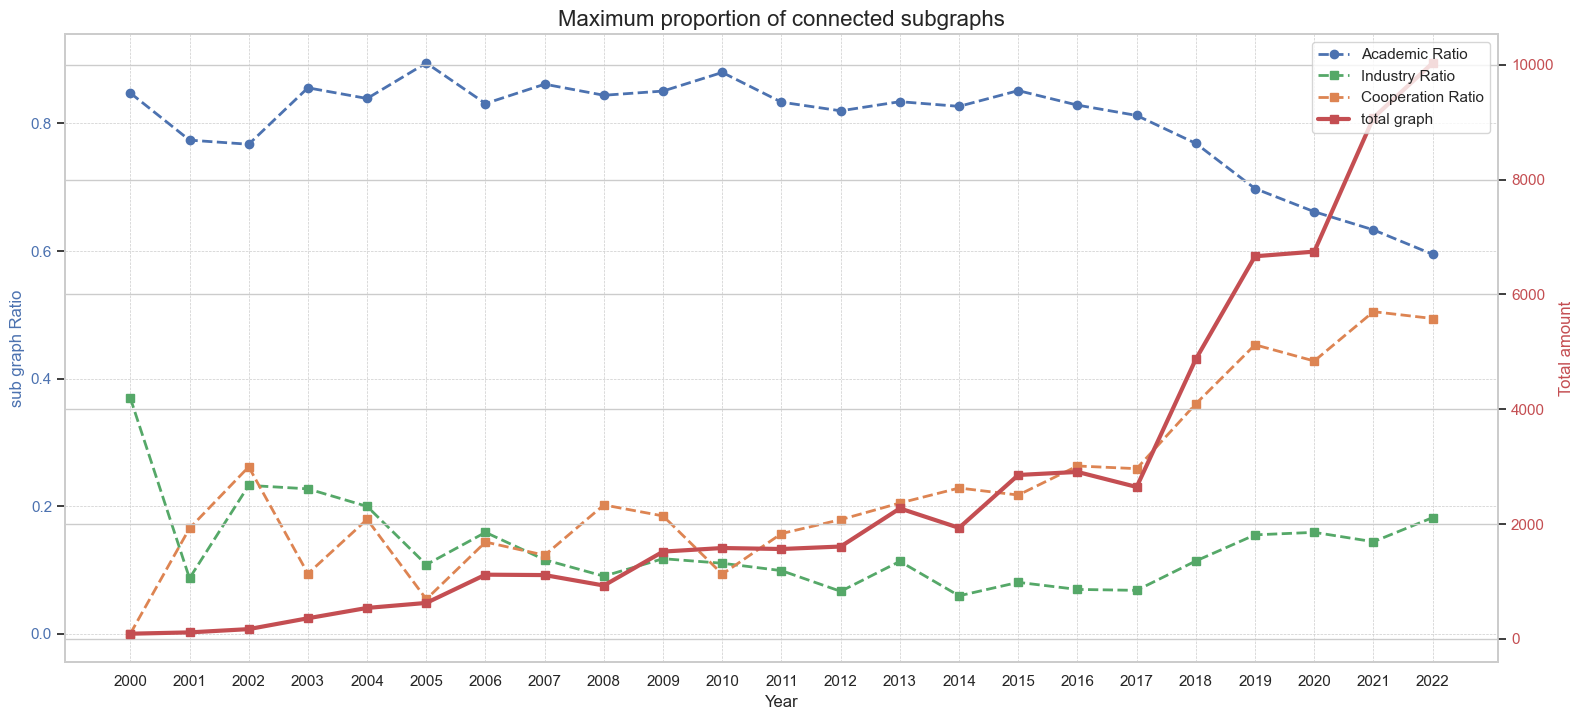

In [14]:
# 使用 Seaborn 的配色方案
sns.set_theme(style="whitegrid")
year = range(2000, 2023)

# 第一个纵坐标轴
fig, ax1 = plt.subplots(figsize=(16, 8))

color_academic = sns.color_palette("deep")[0]  # 使用深色调蓝色
color_industry = sns.color_palette("deep")[2]  # 使用深色调绿
color_cooperaion = sns.color_palette("deep")[1]  # 
ax1.set_xlabel('Year')
ax1.set_ylabel('sub graph Ratio', color=color_academic)
ax1.plot(year, ratio_lists_academic, marker='o', linestyle='--', color=color_academic, linewidth=2, label='Academic Ratio')
ax1.plot(year, ratio_lists_industry, marker='s', linestyle='--', color=color_industry, linewidth=2, label='Industry Ratio')
ax1.plot(year, ratio_lists_cooperation, marker='s', linestyle='--', color=color_cooperaion, linewidth=2, label='Cooperation Ratio')
ax1.tick_params(axis='y', labelcolor=color_academic)

# 第二个纵坐标轴
ax2 = ax1.twinx()  
color_industry = sns.color_palette("deep")[3]  # 使用深色调绿
ax2.set_ylabel('Total amount', color=color_industry)
ax2.plot(year, total_max_graph.values(), marker='s', linestyle='-', color=color_industry, linewidth=3, label='total graph')
ax2.tick_params(axis='y', labelcolor=color_industry)

# 添加标题
plt.title('Maximum proportion of connected subgraphs', fontsize=16)

# 显示网格
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 设置 x 轴的刻度
plt.xticks(year, rotation=45)  # 旋转刻度标签以防止重叠

# 添加图例到右上角
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# 调整图形布局以适应标题和标签
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()